# Homework 1
Writing code is similar to writing in any human language: the content should be syntactically and grammatically correct. However, that is not enough; we expect your writing to be understandable, easy to read, and elegant. The following code needs cleaning up. Please clean the source code to make it more readable. You can assume that the code is correct, and the tests pass. You won't be changing the algorithms, just making it easier to read and maintain. For each problem, you will find a list of changes that you need to make. Here are our general guidelines:

* All imports should be in the header of the code.
* Name your variables and functions with explicit names. Longer but more explicit names are preferred over short but cryptic names (use 'point' instead of 'p').
* Add docstrings to functions.
* Limit the number of arguments of functions.
* A function should do one or two things, not more. If your function is performing multiple unrelated operations, use auxiliary functions.
* Avoid deep nested for/while loops (at most a depth of 2). Use the guard pattern or auxiliary functions if needed.
* Use whitespace appropriately: before and after binary operators (+, -, *, /, =, >, <), but not after a unary operator (like '-'). For example, 'x = -1'.

You are invited to read https://peps.python.org/pep-0008/ or https://google.github.io/styleguide/pyguide.html.

## Problem 1


### Tasks:
* Fix the formatting (4 space indent, no `;` in lines, proper spacing around variables, etc) - try an online code cleanup tool if you want, like <https://black.vercel.app> to clean up spacing - this will also do a couple of the other things for you.
* Drop unneeded characters, like the `.` or `.0` after values (unless you explicitly want an float, such as in a definition), or the `0,` in a `range(0, x)`, or parenthesis around return statements.
* Replace the `%` formatting with an f-string or `.format(...)`. You may need to look at <https://docs.python.org/3/tutorial/inputoutput.html>, specifically [The String Formatting Mini-language](https://docs.python.org/3/library/string.html#formatspec).
* Replace the lists with numpy arrays, and use the correct length instead of 500. This should allow you to clean up several uses of `t`, `y`, and `yy`, and replace the list comprehension of `ysol` with a numpy expression. `[0]*500` can be replaced with `np.zeros(500)`, for example.
* Move the globals (`t`, `y`, `yy`) into the proper functions. You might want to restart the JupyterLab kernel before rerunning after this step just to make sure the global variables are gone. And the global `yy` is actually unused. You can also move `n`, `A`, and `B` into the function call at the end, rather than defining them at the top. You can use `len(t)` instead of `n` in the print loop.
* Clean up `rk4`. The parameter `t` is unused in the `rk4` function; it's immediately replaced. You can either only modify `y`, or return `y` instead of doing both (which is really confusing). It also does not need to loop; it's really only being used to calculate one value at a time. You could pass in `t[0], y[0]` and get `y[1]` back, then repeat.
* Use `n` instead of a hard-coded 24 in `h2`
* See if any lines are better moved/rearranged.

Extra cleanups, but not required for full credit (since it requires knowledge of NumPy array based programming - very similar to matlab, though!):

* Drop as many loops as you can; though several loops may not be able to be removed. You can at least factor out the `t` calculation and make that a simple numpy expression involving `linspace` or `arange` near the beginning of the function.
* Replace `F0`, `F1`, `F2`, `F3` with an array. You can then "roll" the array with a one line expression each time instead of the manual roll that is done. Note that `f` accepts array arguments, so the initial `F` calculation is expressible in one line as long as you compute `F[4]` and then replace it later before using it.


I will expect most of the cleanups to be completed; though you can take a different path or do several of them different ways; just make sure it is similar in legibility.

  k     t      Y numerical      Y exact
   0  0.000  1.00000000000  1.00000000000 
   1  0.125  0.94323921204  0.94323918844 
   2  0.250  0.89749075209  0.89749070775 
   3  0.375  0.86208741701  0.86208735454 
   4  0.500  0.83640232328  0.83640234921 
   5  0.625  0.81984678392  0.81984688684 
   6  0.750  0.81186766577  0.81186783637 
   7  0.875  0.81194534953  0.81194557928 
   8  1.000  0.81959169802  0.81959197914 
   9  1.125  0.83434814878  0.83434847419 
  10  1.250  0.85578392225  0.85578428556 
  11  1.375  0.88349433850  0.88349473391 
  12  1.500  0.91709923593  0.91709965822 
  13  1.625  0.95624148577  0.95624193024 
  14  1.750  1.00058559663  1.00058605904 
  15  1.875  1.04981640349  1.04981688003 
  16  2.000  1.10363783625  1.10363832351 
  17  2.125  1.16177176279  1.16177225773 
  18  2.250  1.22395690218  1.22395740208 
  19  2.375  1.28994780370  1.28994830613 
  20  2.500  1.35951388775  1.35951439058 
  21  2.625  1.43243854486  1.43243904619 
  22  2.750  1

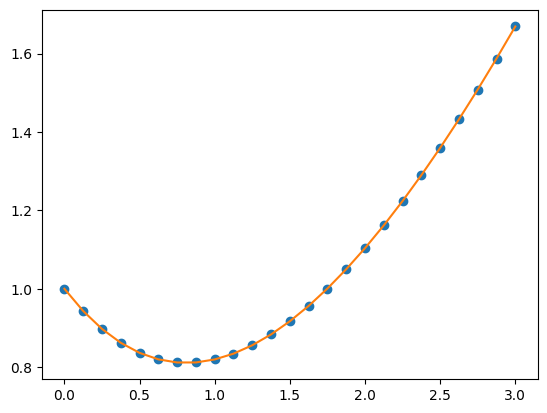

In [1]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# ABM.py:   Adams BM method to integrate ODE
# Solves y' = (t - y)/2,    with y[0] = 1 over [0, 3]

import numpy as np

n = 24                                                 # N steps > 3
A = 0; B = 3.                                           
t =[0]*500;     y =[0]*500;     yy=[0]*4     
                        
def f(t, y):                                      # RHS F function
    return  (t - y)/2.0

def rk4(t, yy, h1):             
    for i in range(0, 3):
        t  = h1 * i
        k0 = h1 * f(t, y[i])
        k1 = h1 * f(t + h1/2., yy[i] + k0/2.)
        k2 = h1 * f(t + h1/2., yy[i] + k1/2.)
        k3 = h1 * f(t + h1, yy[i] + k2 )
        yy[i + 1] = yy[i]  +  (1./6.) * (k0  +  2.*k1  +  2.*k2 + k3)
    return(yy[3])

def ABM(a,b,N):
# Compute 3 additional starting values using rk
   h = (b-a) / N                          # step
   t[0] = a;    y[0] = 1.00;    F0  = f(t[0], y[0])
   for k in range(1, 4):                   
      t[k] = a  +  k * h
   y[1]  = rk4(t[1], y, h)                      # 1st step
   y[2]  = rk4(t[2], y, h)                      # 2nd step
   y[3] = rk4(t[3], y, h)                       # 3rd step
   F1 = f(t[1], y[1]) ; F2 = f(t[2], y[2]) ; F3 = f(t[3], y[3])
   h2 = h/24.

   for k in range(3, N):                               # Predictor
      p = y[k]  +  h2*(-9.*F0  +  37.*F1 - 59.*F2 + 55.*F3)
      t[k + 1] = a + h*(k+1)                       # Next abscissa
      F4 = f(t[k+1], p)                        
      y[k+1] = y[k] + h2*(F1-5.*F2 + 19.*F3 + 9.*F4)   # Corrector
      F0 = F1 ; F1 = F2 ; F2 = F3                  # Update values
      F3 = f(t[k + 1], y[k + 1])
   return(t,y)

import matplotlib.pyplot as plt

print("  k     t      Y numerical      Y exact")
t, y = ABM(A,B,n)
ysol = [3.*np.exp(-tv/2.) - 2. + tv for tv in t]

for k in range(0, n+1):
    print(" %3d  %5.3f  %12.11f  %12.11f " % (k,t[k],y[k],ysol[k]))

plt.plot(t[:n+1], y[:n+1], 'o')
plt.plot(t[:n+1], ysol[:n+1])
plt.show()

## Problem 2

### Tasks
* Replace the import `from numpy import *` by the recommended non-overwriting `import numpy as np`. Propagate the subsequent changes.
* Remove unecessary parenthesis and white-spaces (Black, see above, can help)
* Rename variables with more explicit and clear name.
* Rename global variables with uppercase names.
* Refactor statements written on the same line by using one line for each statement. For example `vmin = 0.; vmax = 1.` should be rewritten.
```
vmin = 0.
vmax = 1.
```
* Refactor non-recommended initialization  `m = i = j = t = t1 = pp = p1 = p2 = p3 = 0` by using individual initialization closer to where the variable is used. Remove useless initializations.
* To simplify the body of the function `gauss`, define three auxilliary functions `integration_0`, `integration_1` and `integration_2` computing the integration for `job = 1`, `job = 2` and `job = 3` respectively.
* It is recommended to limit the depth of nested loop to two. Refactor the nested loop for-while-for by using an auxiliary function.
* The function `gauss` called with `job > 2` or `job < 0` doesn't do anything. Fix this underised behavior by catching those cases with exceptions.
* Add docstring to each functions. For example 
```
def f(x):
    """
    Compute the exponential of x.

    Args:
        x (float): The input value.

    Returns:
        float: Exponential of x
    """
    return (exp(-x))
```

Extra clean up:
* In the present implementation, the function `gauss` modifies its input. Refactor the code by writing a `gauss` function which takes as input the size of the discretization and returns something.

In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# IntegGauss.py:   Gaussian quadrature


from numpy import *
import math

max_in = 11  # Number of intervals
vmin = 0.; vmax = 1.  # Integration ranges
ME = 2.718281828459045E0  # Euler's constant

w = zeros( (2001), float)
x = zeros( (2001), float)


def f(x):  # The integrand
    return (exp(-x))


def gauss(npts, job, a, b, x, w):
    m = i = j = t = t1 = pp = p1 = p2 = p3 = 0
    eps = 3.E-14  # Accuracy: ******ADJUST THIS*******!
    m = (npts + 1) // 2
    for i in range(1, m + 1):
        t = cos(math.pi * (float(i) - 0.25) / (float(npts) + 0.5))
        t1 = 1
        while (abs(t - t1) >= eps):
            p1 = 1.0; p2 = 0.0
            for j in range(1, npts + 1):
                p3 = p2; p2 = p1
                p1 = ((2.0*float(j)-1)*t*p2 - (float(j)-1.0)*p3)/(float(j))
            pp = npts*(t*p1 - p2) / (t*t - 1.)
            t1 = t; t = t1 - p1 / pp
        x[i - 1] = -t; x[npts - i] = t
        w[i - 1] = 2./((1.0-t*t)*pp*pp)
        w[npts - i] = w[i - 1]
    if (job == 0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2. + (b + a)/2.
            w[i] = w[i]*(b - a)/2.
    if (job == 1):
        for i in range(0, npts):
            xi   = x[i]
            x[i] = a * b * (1.0 + xi) / (b + a - (b - a) * xi)
            w[i] = w[i] * 2.0 * a * b * b / ((b + a - (b - a) * xi) * (b + a - (b - a) * xi))
    if (job == 2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b * xi + b + a + a) / (1.0 - xi)
            w[i] = w[i] * 2.0 * (a + b) / ((1.0 - xi) * (1.0 - xi))


def gaussint(no, min, max):
    quadra = 0.
    gauss(no, 0, min, max, x, w)  # Returns pts & wts
    for n in range(0, no):
        quadra += f(x[n]) * w[n]  # Calculate integral
    return (quadra)


for i in range(3, max_in + 1, 2):
    result = gaussint(i, vmin, vmax)
    print(" i ", i, " err ", abs(result - 1 + 1/ME))

 i  3  err  3.0316449151079894e-07
 i  5  err  2.454703107446221e-13
 i  7  err  4.773959005888173e-15
 i  9  err  3.9968028886505635e-15
 i  11  err  1.0547118733938987e-14
